In [1]:
import logging
logging.getLogger("matplotlib").setLevel(logging.ERROR)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import timedelta
import xarray as xr
from glob import glob
import sys, os
import cartopy
cartopy.config['pre_existing_data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
cartopy.config['data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
cartopy.config['repo_data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
from parcels import FieldSet, Field, ParticleSet, JITParticle, AdvectionRK4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
land_feature=cfeature.NaturalEarthFeature(category='physical',name='land',scale='50m',facecolor=[0.4,0.6,0.7])
pr1=ccrs.PlateCarree()

#sys.path.insert(0, os.path.abspath(os.path.join(".")))
#from virtualargofleet import Velocity, VirtualFleet, FloatConfiguration, VelocityField
#U1000=np.load('u1000.npy')
#V1000=np.load('v1000.npy')

In [2]:
import parcels
parcels.__version__

'3.0.4'

In [2]:
# mask with security : 
#ds_path = '/home/shom_simurep/public_no_ftp/PROJETS/IberArgo/GIGATL/DEPTHS/gigatl1_1h_tides_iberia_daily_2008-03-14.nc'
ds_path = 'test_1.nc'
ds = xr.open_dataset(ds_path)
#ds['depth_rho'] = -1*ds['depth_rho'].transpose('time','sig_rho','y_rho','x_rho')
mask = ds.isel(time=0)['depth_rho'].max(['sig_rho']) - 50

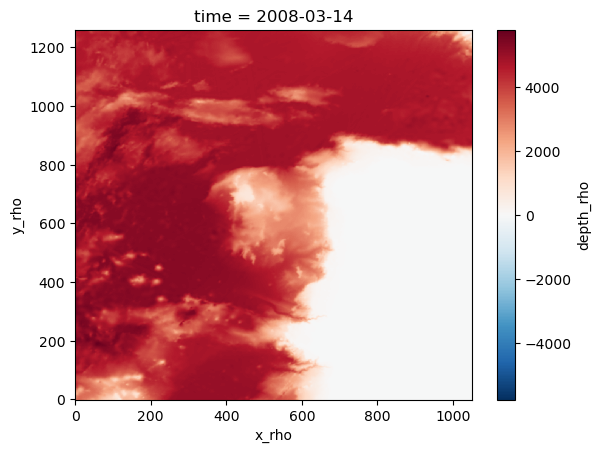

In [21]:
mask.plot()

In [3]:
#files=test_path
#files = '/home1/scratch/kbalem/test_concat_gigatl_6month.nc'
files = ds_path

variables = {'U': 'u', 'V': 'v', 'depth_rho':'depth_rho'}

dimensions = {'U': {'lon': 'lon_u', 'lat': 'lat_u', 'depth': 'depth_rho', 'time': 'time'},
              'V': {'lon': 'lon_u', 'lat': 'lat_u', 'depth': 'depth_rho', 'time': 'time'},
              'depth_rho' : {'lon': 'lon_rho', 'lat': 'lat_rho', 'depth': 'depth_rho', 'time': 'time'}}

fieldset = FieldSet.from_c_grid_dataset(files, variables, dimensions, allow_time_extrapolation=True)

fieldset.add_field(Field('bathy',mask.values,lon=fieldset.U.lon,lat=fieldset.U.lat,interp_method='nearest'))

In [4]:
fieldset.computeTimeChunk(fieldset.U.grid.time[0], 1.)

inf

/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.

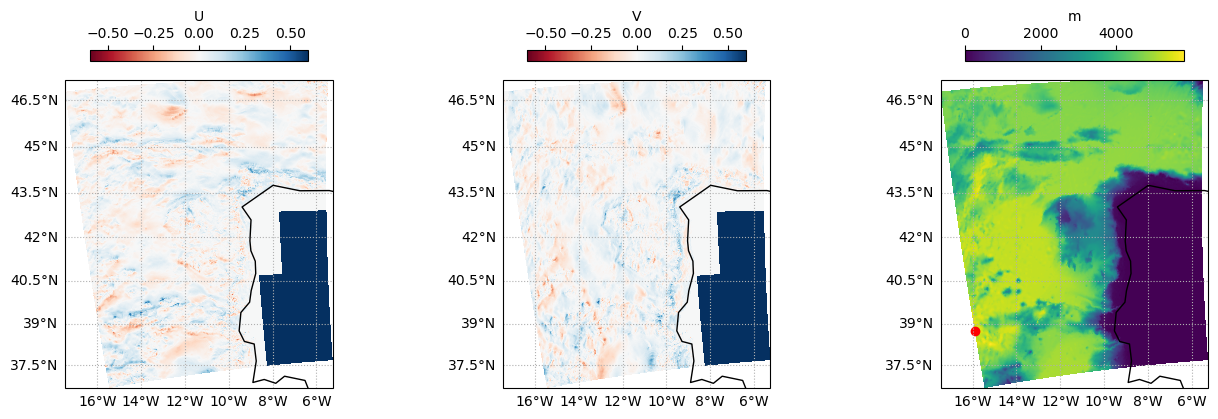

In [24]:
fig=plt.figure(figsize=(16,5))
pr1=ccrs.PlateCarree()
pr2=ccrs.Mercator()
ax1 = fig.add_subplot(1, 3, 1, projection=pr2)
a=ax1.pcolormesh(fieldset.U.grid.lon,fieldset.U.grid.lat,fieldset.U.data[0,0,:-1,:-1],shading='flat',transform=pr1,vmin=-0.6,vmax=0.6,cmap=plt.get_cmap('RdBu'))
ax1.coastlines(resolution='110m',zorder=10)
plt.colorbar(a,location='top',shrink=0.6,label='U')
ga=ax1.gridlines(linestyle=':',draw_labels=True)
ga.top_labels, ga.right_labels = False, False
ax1 = fig.add_subplot(1, 3, 2, projection=pr2)
a=ax1.pcolormesh(fieldset.V.grid.lon,fieldset.V.grid.lat,fieldset.V.data[0,0,:-1,:-1],shading='flat',transform=pr1,vmin=-0.6,vmax=0.6,cmap=plt.get_cmap('RdBu'))
ax1.coastlines(resolution='110m',zorder=10)
plt.colorbar(a,location='top',shrink=0.6,label='V')
ga=ax1.gridlines(linestyle=':',draw_labels=True)
ga.top_labels, ga.right_labels = False, False
ax1 = fig.add_subplot(1, 3, 3, projection=pr2)
a=ax1.pcolormesh(fieldset.bathy.grid.lon,fieldset.bathy.grid.lat,fieldset.bathy.data[0,:-1,:-1],shading='flat',transform=pr1,cmap=plt.get_cmap('viridis'),vmin=0)
ax1.coastlines(resolution='110m',zorder=10)
ax1.plot(-15.911400303628652, 38.73887577854611,'ro',transform=pr1)
ga=ax1.gridlines(linestyle=':',draw_labels=True)
ga.top_labels, ga.right_labels = False, False
plt.colorbar(a,location='top',shrink=0.6,label='m')

In [25]:
# Check if we can interpolate ?
print(fieldset.UV[0,3,38.73887577854611,-15.911400303628652],fieldset.bathy[0,3,38.73887577854611,-15.911400303628652])

Correct cell not found after 1000000 iterations


RuntimeError: U sampled out-of-bound, at (-15.911400303628652, 38.73887577854611, 0). Error could not be handled because particle was not part of the Field Sampling.

In [5]:
print(fieldset.gridset.grids[0].depth.min(),fieldset.gridset.grids[0].depth.max())

0.093762346 5826.7


# SHOULD WE TAKE CARE OF NEGATIVE DEPTH ?

In [4]:
# Set min/max depth for float conf, this is to make sure Parcels doesn't struggle 
min_depth = 2.5 #np.ceil(ds['depth_rho'].max(['sig_rho']).min().values)
max_depth = int(fieldset.gridset.grids[0].depth.max() / 100)*100
print(min_depth,max_depth)
fieldset.add_constant("vf_surface",min_depth)
fieldset.add_constant("vf_bottom", max_depth)

2.5 5800


In [5]:
# Number of float we want to simulate
#nfloats = 20

# Then we must define numpy array (size nfloats) for lat, lon, depth and time
#lon0, lat0 = -12, 41  # Center of the box
#Lx, Ly = 3.5, 6.0 # Size of the box
#lon = np.random.uniform(lon0-Lx/2, lon0+Lx/2, size=nfloats)
#lat = np.random.uniform(lat0-Ly/2, lat0+Ly/2, size=nfloats)
#tim = np.array(['2008-03-14T12:00:00.00' for i in range(nfloats)],dtype='datetime64')
#depth = np.array([min_depth for i in range(nfloats)])
# Define the deployment plan as a dictionary:
my_plan = {'lat': np.array([38.73887577854611]), 
           'lon': np.array([-15.911400303628652]), 
           'time': np.array(['2008-03-14T12:00:00.00'],dtype='datetime64'), 
           'depth':np.array([2.5])}

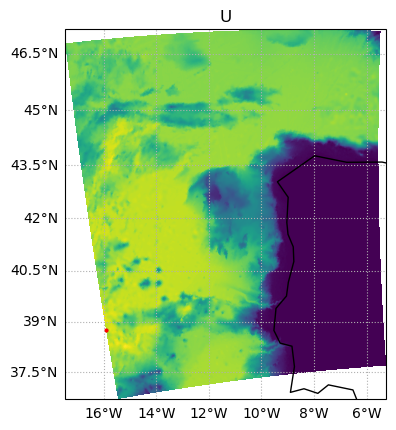

In [30]:
fig=plt.figure()
pr1=ccrs.PlateCarree()
pr2=ccrs.Mercator()
ax1 = fig.add_subplot(1, 1, 1, projection=pr2)
a=ax1.pcolormesh(fieldset.bathy.grid.lon,fieldset.bathy.grid.lat,fieldset.bathy.data[0,:-1,:-1],shading='flat',transform=pr1,cmap=plt.get_cmap('viridis'),vmin=0)
ax1.coastlines(resolution='110m',zorder=10)
ax1.set_title('U')
ga=ax1.gridlines(linestyle=':',draw_labels=True)
ga.top_labels, ga.right_labels = False, False
ax1.plot(my_plan['lon'],my_plan['lat'],'r.',markersize=4,transform=pr1)

In [6]:
cfg = FloatConfiguration('default')
cfg.update('cycle_duration',24*2)
cfg.update('profile_depth',1000)
cfg.update('parking_depth',500)
cfg

<FloatConfiguration><default>
- cycle_duration (Maximum length of float complete cycle): 48.0 [hours]
- life_expectancy (Maximum number of completed cycle): 200 [cycle]
- parking_depth (Drifting depth): 500.0 [m]
- profile_depth (Maximum profile depth): 1000.0 [m]
- vertical_speed (Vertical profiling speed): 0.09 [m/s]

In [7]:
VFleet = VirtualFleet(plan=my_plan, fieldset=fieldset, mission=cfg, verbose_events=False)
VFleet

<VirtualFleet>
- 1 floats in the deployment plan
- No simulation performed

In [8]:
VFleet.simulate(
            duration=timedelta(days=5),
            step=timedelta(minutes=5),
            record=timedelta(minutes=30),
            output_folder="/home1/scratch/kbalem/",
        )

INFO: Output files are stored in /home1/scratch/kbalem/ax3fnbo3.zarr.


/home1/datahome/kbalem/VirtualCrocoFleet/virtualargofleet/virtualargofleet.py:331: UserWarning: Simulation will be saved in : /home1/scratch/kbalem/ax3fnbo3.zarr
  warnings.warn(output_msg)


  0%|          | 0/432000.0 [00:00<?, ?it/s]Correct cell not found after 1000000 iterations


NameError: name 'FieldOutOfBoundError' is not defined

In [29]:
dout=xr.open_zarr('/home1/scratch/kbalem/0j5s5rd4.zarr')
dout.load()

<xarray.Dataset> Size: 486kB
Dimensions:       (trajectory: 20, obs: 432)
Coordinates:
  * obs           (obs) int32 2kB 0 1 2 3 4 5 6 ... 425 426 427 428 429 430 431
  * trajectory    (trajectory) int64 160B 20 21 22 23 24 25 ... 35 36 37 38 39
Data variables:
    cycle_age     (trajectory, obs) float32 35kB 300.0 2.1e+03 ... 8.49e+04
    cycle_number  (trajectory, obs) float64 69kB 1.0 1.0 1.0 1.0 ... 5.0 5.0 5.0
    cycle_phase   (trajectory, obs) float64 69kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0
    in_water      (trajectory, obs) float32 35kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    lat           (trajectory, obs) float64 69kB 40.32 40.32 ... 37.76 37.75
    lon           (trajectory, obs) float64 69kB -12.6 -12.6 ... -10.51 -10.51
    time          (trajectory, obs) datetime64[ns] 69kB 2008-03-14T12:00:00 ....
    z             (trajectory, obs) float64 69kB 2.5 164.5 326.5 ... 500.0 500.0
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        ArgoParticleArgoFloatKernelAdvectionRK4KeepInWate...
    parcels_mesh:           spherical
    parcels_version:        3.0.0

/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.

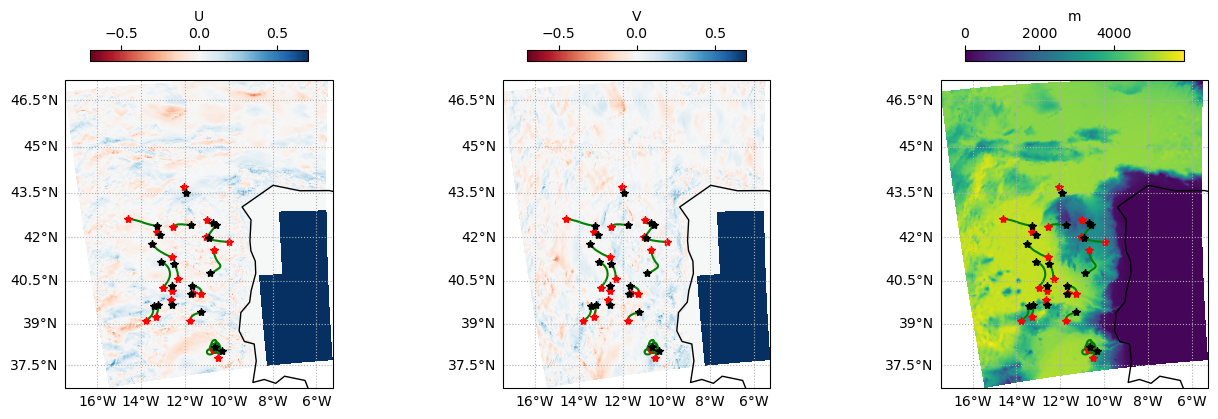

In [30]:
extent = [-15,-12,40.5,45]

fig=plt.figure(figsize=(16,5))
pr1=ccrs.PlateCarree()
pr2=ccrs.Mercator()
ax1 = fig.add_subplot(1, 3, 1, projection=pr2)
a=ax1.pcolormesh(fieldset.U.grid.lon,fieldset.U.grid.lat,fieldset.U.data[0,0,:-1,:-1],shading='flat',transform=pr1,vmin=-0.7,vmax=0.7,cmap=plt.get_cmap('RdBu'))
ax1.coastlines(resolution='110m',zorder=10)
ga=ax1.gridlines(linestyle=':',draw_labels=True)
ga.top_labels, ga.right_labels = False, False
for t in range(len(dout.trajectory.values)):
    ax1.plot(dout['lon'].isel(obs=0,trajectory=t),dout['lat'].isel(obs=0,trajectory=t),'k*',transform=pr1,zorder=10)
    ax1.plot(dout['lon'].isel(trajectory=t),dout['lat'].isel(trajectory=t),'g',transform=pr1)
    ax1.plot(dout['lon'].isel(trajectory=t, obs=-1),dout['lat'].isel(trajectory=t, obs=-1),'r*',transform=pr1)
plt.colorbar(a,location='top',shrink=0.6,label='U')
#ax1.set_extent(extent)

ax1 = fig.add_subplot(1, 3, 2, projection=pr2)
a=ax1.pcolormesh(fieldset.V.grid.lon,fieldset.V.grid.lat,fieldset.V.data[0,0,:-1,:-1],shading='flat',transform=pr1,vmin=-0.7,vmax=0.7,cmap=plt.get_cmap('RdBu'))
ax1.coastlines(resolution='110m',zorder=10)
ga=ax1.gridlines(linestyle=':',draw_labels=True)
ga.top_labels, ga.right_labels = False, False
for t in range(len(dout.trajectory.values)):
    ax1.plot(dout['lon'].isel(obs=0,trajectory=t),dout['lat'].isel(obs=0,trajectory=t),'k*',transform=pr1,zorder=10)
    ax1.plot(dout['lon'].isel(trajectory=t),dout['lat'].isel(trajectory=t),'g',transform=pr1)
    ax1.plot(dout['lon'].isel(trajectory=t, obs=-1),dout['lat'].isel(trajectory=t, obs=-1),'r*',transform=pr1)
plt.colorbar(a,location='top',shrink=0.6,label='V')    
#ax1.set_extent(extent)

ax1 = fig.add_subplot(1, 3, 3, projection=pr2)
a=ax1.pcolormesh(fieldset.bathy.grid.lon,fieldset.bathy.grid.lat,fieldset.bathy.data[0,:-1,:-1],shading='flat',transform=pr1,cmap=plt.get_cmap('viridis'),vmin=0)
ax1.coastlines(resolution='110m',zorder=10)
ga=ax1.gridlines(linestyle=':',draw_labels=True)
ga.top_labels, ga.right_labels = False, False
for t in range(len(dout.trajectory.values)):
    ax1.plot(dout['lon'].isel(obs=0,trajectory=t),dout['lat'].isel(obs=0,trajectory=t),'k*',transform=pr1,zorder=10)
    ax1.plot(dout['lon'].isel(trajectory=t),dout['lat'].isel(trajectory=t),'g',transform=pr1)
    ax1.plot(dout['lon'].isel(trajectory=t, obs=-1),dout['lat'].isel(trajectory=t, obs=-1),'r*',transform=pr1)
plt.colorbar(a,location='top',shrink=0.6,label='m')
#ax1.set_extent(extent)

/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/home1/datahome/kbalem/conda-env/virtualfleet-v3/lib/python3.9/site-packages/matplotlib/colors.py:732: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


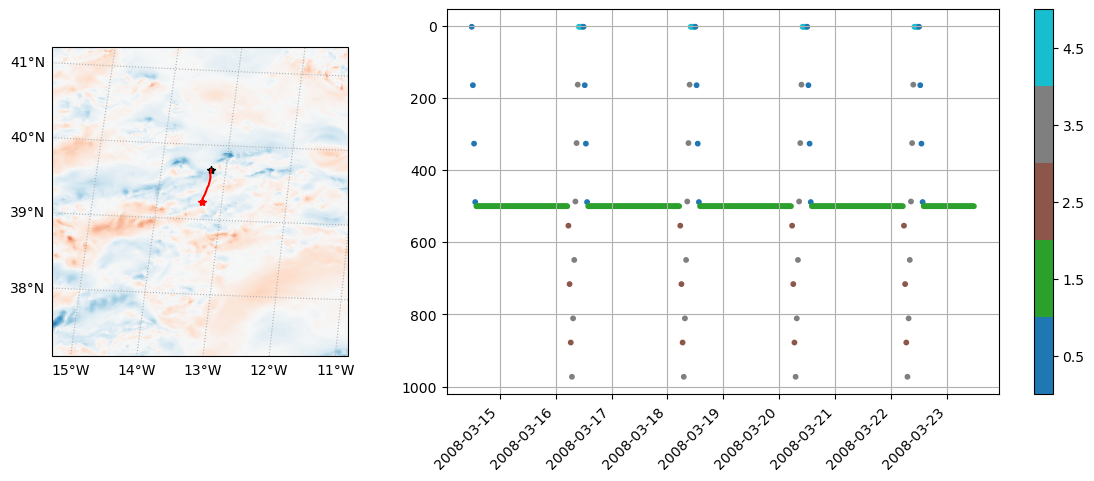

In [31]:
tr=4

fig=plt.figure(figsize=(14,5))
gs = gridspec.GridSpec(1,2,width_ratios=[.6,1.4])
pr1=ccrs.PlateCarree()
pr2=ccrs.LambertAzimuthalEqualArea()
ax1 = fig.add_subplot(gs[0], projection=pr2)
ax1.pcolormesh(fieldset.U.grid.lon,fieldset.U.grid.lat,fieldset.U.data[0,0,:-1,:-1],shading='flat',transform=pr1,vmin=-0.7,vmax=0.7,cmap=plt.get_cmap('RdBu'))
ax1.coastlines(resolution='110m',zorder=10)
ga=ax1.gridlines(linestyle=':',draw_labels=True)
ga.top_labels, ga.right_labels = False, False

ax1.plot(dout['lon'].isel(trajectory=tr,obs=0),dout['lat'].isel(trajectory=tr,obs=0),'k*',transform=pr1)
ax1.plot(dout['lon'].isel(trajectory=tr),dout['lat'].isel(trajectory=tr),'r',transform=pr1)
ax1.plot(dout['lon'].isel(trajectory=tr,obs=-1),dout['lat'].isel(trajectory=tr,obs=-1),'r*',transform=pr1)
extent=[dout['lon'].isel(trajectory=tr,obs=-1).min().values -2,
        dout['lon'].isel(trajectory=tr,obs=-1).max().values +2,
        dout['lat'].isel(trajectory=tr,obs=-1).min().values -2,
        dout['lat'].isel(trajectory=tr,obs=-1).max().values +2]
ax1.set_extent(extent)

ax = fig.add_subplot(gs[1])
a=ax.scatter(dout['time'].isel(trajectory=tr),dout['z'].isel(trajectory=tr),s=10,c=dout['cycle_phase'].isel(trajectory=tr),cmap=plt.get_cmap('tab10',5),vmin=0,vmax=5)
ax.invert_yaxis()
_=plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(':')
#ax.set_xlim([np.datetime64('2011-01-15'),np.datetime64('2011-01-16')])
plt.colorbar(a,ticks=[0.5,1.5,2.5,3.5,4.5])